# 2022 COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
Section 5 is stand-alone as required. Other sections can be run in ascending order. All required empirical evidences, explanations and justifications have been provided in relevant parts of section 4.

*If there is something to be noted for the marker, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [ ]:
# Preview of the data in the csv file, which has two columns: 
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head()

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...


In [ ]:
# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

## 1.1. URL Removal
*related to the section 4.2*

In [ ]:
# need re for matching url
import re 

# method for removing url and doing some basic cleaning/formatting for better experience later
def url_remover(tx):
    # escape the pipe separators
    regex = re.compile('[%s]' % re.escape('|'))
    tx = regex.sub(' ',tx)
    # deal with words individually and remove those with http (i.e. url)
    ws = str(tx).split()
    ws = [x for x in ws if not 'http' in x]
    # join the words when done, then return them
    ws = ' '.join(ws)
    return ws

# apply the above method
training_posts1 = training_data['posts'].apply(url_remover)
# verify by checking 1st row
training_posts1[0]

"enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389 84390 ... Welcome and stuff. Game. Set. Match. Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by... All things in moderation. Sims is indeed a video

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [ ]:
# need re as earlier
import re
# remove punctuations and numbers, go lowercase 
def pln(x):
    x = re.sub(r'[^\w\s]','',x)
    x = re.sub('^\d+\s|\s\d+\s|\s\d+$','',x)
    x = x.lower()
    return x
training_posts1 = training_posts1.apply(pln)

# now, remove stopwords - need nltk for this
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
def stopper(x):
    tokens = word_tokenize(x)
    stop_words = sw.words()
    x = [w for w in tokens if not w in stop_words]
    return x 
training_posts1 = training_posts1.apply(stopper)

# encoding etc. done later

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.




---



# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [ ]:
# cbow, more processing done later
from gensim.models import Word2Vec
wv_cbow_model2 = Word2Vec(sentences=training_posts1, size=100, window=3, min_count=5, workers=2, sg=0)

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [ ]:
# more data processing
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

# glove
import gensim.downloader as api
word_emb_model1 = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


## 2.3. Input Concatenation
*related to the section 4.3*

In [ ]:
import numpy as np
emb_dim = wv_cbow_model2.vector_size+word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1 and word in wv_cbow_model2:
        emb_table.append(np.concatenate((wv_cbow_model2[word],word_emb_model1[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [ ]:
seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model1 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model1.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model1(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')

Epoch: 1, loss: 0.69344, train_acc: 0.51
Epoch: 2, loss: 0.68934, train_acc: 0.54
Epoch: 3, loss: 0.68773, train_acc: 0.54
Epoch: 4, loss: 0.68586, train_acc: 0.55
Epoch: 5, loss: 0.68344, train_acc: 0.55
Epoch: 6, loss: 0.68101, train_acc: 0.55
Epoch: 7, loss: 0.67890, train_acc: 0.56
Epoch: 8, loss: 0.67708, train_acc: 0.57
Epoch: 9, loss: 0.67530, train_acc: 0.58
Epoch: 10, loss: 0.67336, train_acc: 0.58
Epoch: 11, loss: 0.67125, train_acc: 0.59
Epoch: 12, loss: 0.66913, train_acc: 0.59
Epoch: 13, loss: 0.66713, train_acc: 0.59
Epoch: 14, loss: 0.66521, train_acc: 0.59
Epoch: 15, loss: 0.66319, train_acc: 0.60
Epoch: 16, loss: 0.66098, train_acc: 0.60
Epoch: 17, loss: 0.65871, train_acc: 0.60
Epoch: 18, loss: 0.65660, train_acc: 0.61
Epoch: 19, loss: 0.65458, train_acc: 0.61
Epoch: 20, loss: 0.65242, train_acc: 0.62
Epoch: 21, loss: 0.65029, train_acc: 0.62
Epoch: 22, loss: 0.64848, train_acc: 0.62
Epoch: 23, loss: 0.64666, train_acc: 0.62
Epoch: 24, loss: 0.64482, train_acc: 0.63
E

# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*):

Empirical evidence:
See below code cell's output.

Explanation & Justification: 
1. Trend from graphs = higher the window size, worser the performance. Smaller window size tends to capture more about the word itself, larger window size tends to capture more about domain information - this could also explain the slightly different semantic accuracy trend. So, this dataset could be of a type where the word itself is more important.
2. Trend from graphs = higher the dimensions, better the performance. Higher dimensions means a greater dimensional space that words can be mapped onto, so this could be the reason of this trend. But, sometimes overfitting can be an issue if too many dimensions are used - this could also explain the slightly different semantic accuracy trend.
3. Hence, the highest chosen dimensions (100) and lowest chosen window size (3) have been used in the relevant sections.

Cloning into 'GloVe'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 606 (delta 5), reused 7 (delta 2), pack-reused 592
Receiving objects: 100% (606/606), 224.91 KiB | 12.50 MiB/s, done.
Resolving deltas: 100% (343/343), done.


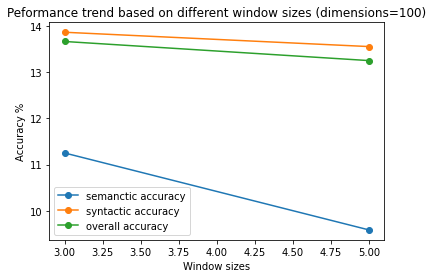

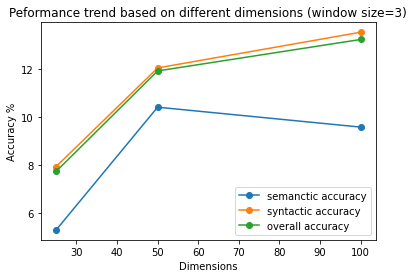

In [ ]:
# window size = 5 and dimensions = 100
wv_cbow_model = Word2Vec(sentences=training_posts1, size=100, window=5, min_count=5, workers=2, sg=0)
wv_cbow_model.wv.save_word2vec_format('cbow_w2v_1.txt', binary=False)
!git clone https://github.com/stanfordnlp/GloVe.git
vectors_file="/content/cbow_w2v_1.txt"
with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]
vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}
# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0: #line missing
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)


        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

sem1 = (100 * correct_sem / float(count_sem), correct_sem, count_sem)

syn1 = (100 * correct_syn / float(count_syn), correct_syn, count_syn)

tot1 = (100 * correct_tot / float(count_tot), correct_tot, count_tot)
###################################################################################################################################################################
# different window size (window size = 3 and dimensions = 100)
wv_cbow_model2.wv.save_word2vec_format('cbow_w2v_2.txt', binary=False)
vectors_file="/content/cbow_w2v_2.txt"
with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]
vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}
# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0: #line missing
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

sem2 = (100 * correct_sem / float(count_sem), correct_sem, count_sem)

syn2 = (100 * correct_syn / float(count_syn), correct_syn, count_syn)

tot2 = (100 * correct_tot / float(count_tot), correct_tot, count_tot)
###################################################################################################################################################################
# different dimensions (window size = 3 and dimensions = 50)
wv_cbow_model3 = Word2Vec(sentences=training_posts1, size=50, window=3, min_count=5, workers=2, sg=0)
wv_cbow_model3.wv.save_word2vec_format('cbow_w2v_3.txt', binary=False)
vectors_file="/content/cbow_w2v_3.txt"
with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]
vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}
# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0: #line missing
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)


        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

sem3 = (100 * correct_sem / float(count_sem), correct_sem, count_sem)

syn3 = (100 * correct_syn / float(count_syn), correct_syn, count_syn)

tot3 = (100 * correct_tot / float(count_tot), correct_tot, count_tot)
###################################################################################################################################################################
# different dimensions again (window size = 3 and dimensions = 25)
wv_cbow_model4 = Word2Vec(sentences=training_posts1, size=25, window=3, min_count=5, workers=2, sg=0)
wv_cbow_model4.wv.save_word2vec_format('cbow_w2v_4.txt', binary=False)
vectors_file="/content/cbow_w2v_4.txt"
with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]
vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}
# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0: #line missing
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)


        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

sem4 = (100 * correct_sem / float(count_sem), correct_sem, count_sem)

syn4 = (100 * correct_syn / float(count_syn), correct_syn, count_syn)

tot4 = (100 * correct_tot / float(count_tot), correct_tot, count_tot)
###################################################################################################################################################################
# graphing based on window sizes
import matplotlib.pyplot as plt
windows = [3,5]
accuracy1_sem = [sem2[0],sem1[0]]
accuracy1_syn = [syn2[0],syn1[0]]
accuracy1_tot = [tot2[0],tot1[0]]
plt.plot(windows,accuracy1_sem,label='semantic accuracy',marker='o')
plt.plot(windows,accuracy1_syn,label='syntactic accuracy',marker='o')
plt.plot(windows,accuracy1_tot,label='overall accuracy',marker='o')
plt.title('Peformance trend based on different window sizes (dimensions=100)')
plt.xlabel('Window sizes')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

# graphing based on dimensions
dims = [25,50,100]
accuracy2_sem = [sem4[0],sem3[0],sem1[0]]
accuracy2_syn = [syn4[0],syn3[0],syn1[0]]
accuracy2_tot = [tot4[0],tot3[0],tot1[0]]
plt.plot(dims,accuracy2_sem,label='semantic accuracy',marker='o')
plt.plot(dims,accuracy2_syn,label='syntactic accuracy',marker='o')
plt.plot(dims,accuracy2_tot,label='overall accuracy',marker='o')
plt.title('Peformance trend based on different dimensions (window size=3)')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

Empirical evidence:
See output of below code cell.

Explanation & Justification:
1. Trend from tables = The f1 scores were better for without URL (3rd table) than for with URL (4th table). So, having no URL is better, as it is not the main part of each post, and also may contain irrelevant special characters like /.  
2. Trend from tables = The f1 scores were better for without stopwords (1st table) than for with stopwords (2nd table). Stopwords are highly common words (for e.g. prepositions) that do not add much meaning to posts, so not having them is better.
3. Hence, both URL and stopwords have been removed when processing data in relevant sections.



In [26]:
# without URL. punctuation, numbers & stopwords removed. all lowercase
import re 

# method for removing url and doing some basic cleaning/formatting for better experience later
def url_remover(tx):
    # escape the pipe separators
    regex = re.compile('[%s]' % re.escape('|'))
    tx = regex.sub(' ',tx)
    # deal with words individually and remove those with http (i.e. url)
    ws = str(tx).split()
    ws = [x for x in ws if not 'http' in x]
    # join the words when done, then return them
    ws = ' '.join(ws)
    return ws

# apply the above method
testing_posts1 = testing_data['posts'].apply(url_remover)
# need re as earlier
import re
# remove punctuations and numbers, go lowercase 
def pln(x):
    x = re.sub(r'[^\w\s]','',x)
    x = re.sub('^\d+\s|\s\d+\s|\s\d+$','',x)
    x = x.lower()
    return x
testing_posts1 = testing_posts1.apply(pln)

# now, remove stopwords - need nltk for this
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
def stopper(x):
    tokens = word_tokenize(x)
    stop_words = sw.words()
    x = [w for w in tokens if not w in stop_words]
    return x 
testing_posts1 = testing_posts1.apply(stopper)

testing_encoded1 = encode_and_add_padding(testing_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(testing_labels)
label_encoded= lEnc.transform(testing_labels)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn #ignore irrelavant warnings that came up

# start evaluation
model1.eval()
outputs = model1(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded, predicted.cpu().numpy(),digits=4))
##############################################################################
# without URL. punctuation & numbers removed. all lowercase
import re 

# method for removing url and doing some basic cleaning/formatting for better experience later
def url_remover(tx):
    # escape the pipe separators
    regex = re.compile('[%s]' % re.escape('|'))
    tx = regex.sub(' ',tx)
    # deal with words individually and remove those with http (i.e. url)
    ws = str(tx).split()
    ws = [x for x in ws if not 'http' in x]
    # join the words when done, then return them
    ws = ' '.join(ws)
    return ws

# apply the above method
testing_posts2 = testing_data['posts'].apply(url_remover)
training_posts2 = training_data['posts'].apply(url_remover)
# need re as earlier
import re
# remove punctuations and numbers, go lowercase 
def pln(x):
    x = re.sub(r'[^\w\s]','',x)
    x = re.sub('^\d+\s|\s\d+\s|\s\d+$','',x)
    x = x.lower()
    return x
testing_posts2 = testing_posts2.apply(pln)
training_posts2 = training_posts2.apply(pln)

from gensim.models import Word2Vec
wv_cbow_model2 = Word2Vec(sentences=training_posts2, size=100, window=3, min_count=5, workers=2, sg=0)

word_set_train = set() 
for sent in training_posts2:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import gensim.downloader as api
word_emb_model1 = api.load("glove-twitter-25")

import numpy as np
emb_dim = wv_cbow_model2.vector_size+word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1 and word in wv_cbow_model2:
        emb_table.append(np.concatenate((wv_cbow_model2[word],word_emb_model1[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded2 = encode_and_add_padding(training_posts2, seq_length, word_index_train)
testing_encoded2 = encode_and_add_padding(testing_posts2, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded2= lEnc.transform(training_labels)


vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model2 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded2)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded2)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model2.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model2(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())




model2.eval()
outputs2 = model2(torch.from_numpy(np.array(testing_encoded2)).to(device)) 
predicted2 = torch.argmax(outputs2, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded, predicted2.cpu().numpy(),digits=4))
##############################################################################
# without URL. punctuation removed. all lowercase
import re 

# method for removing URL & doing some basic cleaning/formatting for better experience later
def remover(tx):
    # escape the pipe separators
    regex = re.compile('[%s]' % re.escape('|'))
    tx = regex.sub(' ',tx)
    # deal with words individually
    ws = str(tx).split()
    ws = [x for x in ws if not 'http' in x]
    # join the words when done, then return them
    ws = ' '.join(ws)
    return ws

# apply the above method
testing_posts3 = testing_data['posts'].apply(remover)
training_posts3 = training_data['posts'].apply(remover)
# need re as earlier
import re
# remove punctuations, go lowercase 
def pln(x):
    x = re.sub(r'[^\w\s]','',x)
    x = x.lower()
    return x
testing_posts3 = testing_posts3.apply(pln)
training_posts3 = training_posts3.apply(pln)

from gensim.models import Word2Vec
wv_cbow_model2 = Word2Vec(sentences=training_posts3, size=100, window=3, min_count=5, workers=2, sg=0)

word_set_train = set() 
for sent in training_posts3:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()


word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1


import gensim.downloader as api
word_emb_model1 = api.load("glove-twitter-25")

import numpy as np
emb_dim = wv_cbow_model2.vector_size+word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1 and word in wv_cbow_model2:
        emb_table.append(np.concatenate((wv_cbow_model2[word],word_emb_model1[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)


seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded3 = encode_and_add_padding(training_posts3, seq_length, word_index_train)
testing_encoded3 = encode_and_add_padding(testing_posts3, seq_length, word_index_train)


from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded3= lEnc.transform(training_labels)



vocab_size = len(word_list_train)

unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np

# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model3 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded3)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded3)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model3.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model3(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    


model3.eval()
outputs3 = model3(torch.from_numpy(np.array(testing_encoded3)).to(device)) 
predicted3 = torch.argmax(outputs3, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded, predicted3.cpu().numpy(),digits=4))
##############################################################################
# with URL. punctuation removed. all lowercase
import re 

# method for doing some basic cleaning/formatting for better experience later
def remover(tx):
    # escape the pipe separators
    regex = re.compile('[%s]' % re.escape('|'))
    tx = regex.sub(' ',tx)
    # deal with words individually
    ws = str(tx).split()
    # join the words when done, then return them
    ws = ' '.join(ws)
    return ws

# apply the above method
testing_posts4 = testing_data['posts'].apply(remover)
training_posts4 = training_data['posts'].apply(remover)
# need re as earlier
import re
# remove punctuations, go lowercase 
def pln(x):
    x = re.sub(r'[^\w\s]','',x)
    x = x.lower()
    return x
testing_posts4 = testing_posts4.apply(pln)
training_posts4 = training_posts4.apply(pln)

from gensim.models import Word2Vec
wv_cbow_model2 = Word2Vec(sentences=training_posts4, size=100, window=3, min_count=5, workers=2, sg=0)

word_set_train = set() 
for sent in training_posts4:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import gensim.downloader as api
word_emb_model1 = api.load("glove-twitter-25")

import numpy as np
emb_dim = wv_cbow_model2.vector_size+word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1 and word in wv_cbow_model2:
        emb_table.append(np.concatenate((wv_cbow_model2[word],word_emb_model1[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)



# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded4 = encode_and_add_padding(training_posts4, seq_length, word_index_train)
testing_encoded4 = encode_and_add_padding(testing_posts4, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded4= lEnc.transform(training_labels)


vocab_size = len(word_list_train)

unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np

# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model4 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded4)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded4)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model4.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model4(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    


model4.eval()
outputs4 = model4(torch.from_numpy(np.array(testing_encoded4)).to(device)) 
predicted4 = torch.argmax(outputs4, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded, predicted4.cpu().numpy(),digits=4))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
              precision    recall  f1-score   support

           0     0.6141    0.6167    0.6154       467
           1     0.5503    0.5475    0.5489       400

    accuracy                         0.5848       867
   macro avg     0.5822    0.5821    0.5821       867
weighted avg     0.5846    0.5848    0.5847       867

              precision    recall  f1-score   support

           0     0.5352    0.8951    0.6699       467
           1     0.4302    0.0925    0.1523       400

    accuracy                         0.5248       867
   macro avg     0.4827    0.4938    0.4111       867
weighted avg     0.4868    0.5248    0.4311       867

              precision    recall  f1-score   support

           0     0.5435    0.8158    0.6524       467
       

## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

Empirical evidence:
See below code cell's output.

Explanation and Justification:
1. Trend from tables = The f1 scores were better for continuous bag of words (cbow) (1st table) than for skip-gram (sg) (2nd table). So, cbow is better, as it can better represent more frequent words, and the data's nature might have more frequent words.
2. Trend from tables = The macro and weighted avg f1 scores were better for glove-twitter-25 (3rd table) than for glove-wiki-gigaword-50 (4th table). So, glove-twitter-25 is better, as it has higher number of vectors and thus yields better quality.
3. Trend from tables = The f1 scores were better for cbow+glove-twitter-25 (5th table) than for sg+glove-wiki-gigaword-50 (6th table). Since glove-twitter-25 was better than glove-wiki-gigaword-50, and cbow was better than sg, this is an obvious result.
4. Hence, cbow+glove-twitter-25 have been used in relevant sections.

In [ ]:
# cbow
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import numpy as np
emb_dim = wv_cbow_model2.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in wv_cbow_model2:
        emb_table.append(wv_cbow_model2[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded_1 = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded_1= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_1 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_1)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_1)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_1.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_1(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

model_1.eval()
outputs_1 = model_1(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_1 = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_1, predicted_1.cpu().numpy(),digits=4))
##############################################################################
# sg
from gensim.models import Word2Vec
wv_sg_model1 = Word2Vec(sentences=training_posts1, size=100, window=3, min_count=5, workers=2, sg=1)

word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import numpy as np
emb_dim = wv_sg_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in wv_sg_model1:
        emb_table.append(wv_sg_model1[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded_2 = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded_2= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_2 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_2)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_2)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_2.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_2(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

model_2.eval()
outputs_2 = model_2(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_2 = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_2, predicted_2.cpu().numpy(),digits=4))
##############################################################################
# glove-twitter-25
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import numpy as np
emb_dim = word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1:
        emb_table.append(word_emb_model1[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded_3 = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded_3= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_3 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_3.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_3)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_3)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_3.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_3(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

model_3.eval()
outputs_3 = model_3(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_3 = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_3, predicted_3.cpu().numpy(),digits=4))
##############################################################################
# glove-wiki-gigaword-50
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

# glove
import gensim.downloader as api
word_emb_model2 = api.load("glove-wiki-gigaword-50")

import numpy as np
emb_dim = word_emb_model2.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model2:
        emb_table.append(word_emb_model2[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded_4 = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded_4= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_4 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_4.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_4)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_4)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_4.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_4(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

model_4.eval()
outputs_4 = model_4(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_4 = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_4, predicted_4.cpu().numpy(),digits=4))
##############################################################################
## cbow + glove-twitter-25
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import numpy as np
emb_dim = wv_cbow_model2.vector_size+word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1 and word in wv_cbow_model2:
        emb_table.append(np.concatenate((wv_cbow_model2[word],word_emb_model1[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded_5 = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded_5= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_5 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_5.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_5)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_5)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_5.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_5(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

model_5.eval()
outputs_5 = model_5(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_5 = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_5, predicted_5.cpu().numpy(),digits=4))
##############################################################################
# sg + glove-wiki-gigaword-50
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import numpy as np
emb_dim = wv_sg_model1.vector_size+word_emb_model2.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model2 and word in wv_sg_model1:
        emb_table.append(np.concatenate((wv_sg_model1[word],word_emb_model2[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded_6 = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded_6= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_6 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_6.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_6)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_6)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_6.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_6(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

model_6.eval()
outputs_6 = model_6(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_6 = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_6, predicted_6.cpu().numpy(),digits=4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


              precision    recall  f1-score   support

           0     0.6621    0.7185    0.6891      4227
           1     0.6305    0.5672    0.5972      3581

    accuracy                         0.6491      7808
   macro avg     0.6463    0.6428    0.6432      7808
weighted avg     0.6476    0.6491    0.6470      7808



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:163: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


              precision    recall  f1-score   support

           0     0.6271    0.7166    0.6689      4227
           1     0.5977    0.4971    0.5428      3581

    accuracy                         0.6159      7808
   macro avg     0.6124    0.6068    0.6058      7808
weighted avg     0.6136    0.6159    0.6110      7808

              precision    recall  f1-score   support

           0     0.5895    0.7223    0.6492      4227
           1     0.5534    0.4063    0.4686      3581

    accuracy                         0.5774      7808
   macro avg     0.5715    0.5643    0.5589      7808
weighted avg     0.5730    0.5774    0.5663      7808

[==================================================] 100.0% 66.0/66.0MB downloaded
              precision    recall  f1-score   support

           0     0.5885    0.7708    0.6674      4227
           1     0.5735    0.3639    0.4452      3581

    accuracy                         0.5841      7808
   macro avg     0.5810    0.5673    0.5563  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:557: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:558: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


              precision    recall  f1-score   support

           0     0.6545    0.7130    0.6825      4227
           1     0.6213    0.5557    0.5867      3581

    accuracy                         0.6409      7808
   macro avg     0.6379    0.6344    0.6346      7808
weighted avg     0.6393    0.6409    0.6386      7808



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:687: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:688: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


              precision    recall  f1-score   support

           0     0.6331    0.7504    0.6868      4227
           1     0.6229    0.4867    0.5465      3581

    accuracy                         0.6295      7808
   macro avg     0.6280    0.6186    0.6166      7808
weighted avg     0.6285    0.6295    0.6224      7808



## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

Empirical evidence: See below code cell's output.

Explanation and Justification:
1. Trend from tables = The f1 scores for Bi-LSTM (1st table) were better than for Bi-RNN (2nd table). So, Bi-LSTM is better, as it solves the vanishing gradient problem and captures long term dependencies better than Bi-RNN.
2. Hence, Bi-LSTM has been used in the relevant sections.

In [ ]:
# bi-lstm
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

import numpy as np
emb_dim = wv_cbow_model2.vector_size+word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1 and word in wv_cbow_model2:
        emb_table.append(np.concatenate((wv_cbow_model2[word],word_emb_model1[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded_5 = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded_5= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_LSTM = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_LSTM.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_5)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_5)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_LSTM.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_LSTM(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

model_LSTM.eval()
outputs_LSTM = model_LSTM(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_LSTM = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_5, predicted_LSTM.cpu().numpy(),digits=4))
##############################################################################
# bi-rnn
class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False
        # set the bidirectional to True
        self.rnn = nn.RNN(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(2*n_hidden,n_class)

    def forward(self, x):  
        # Get the embeded tensor
        x = self.emb(x)       
        x, h_n = self.rnn(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)
        return output

# Initialize model, set up the loss calculator and optimizer
model_RNN = Bi_RNN_Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_RNN.parameters(), lr=learning_rate)

input_torch = torch.from_numpy(np.array(sent_encoded_5)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_5)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_RNN.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_RNN(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

## Prediction
model_RNN.eval()
outputs_RNN = model_RNN(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
predicted_RNN = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(label_encoded_5, predicted_RNN.cpu().numpy(),digits=4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


              precision    recall  f1-score   support

           0     0.6603    0.7114    0.6849      4227
           1     0.6251    0.5680    0.5952      3581

    accuracy                         0.6456      7808
   macro avg     0.6427    0.6397    0.6400      7808
weighted avg     0.6441    0.6456    0.6437      7808

              precision    recall  f1-score   support

           0     0.6480    0.7291    0.6862      4227
           1     0.6248    0.5325    0.5750      3581

    accuracy                         0.6390      7808
   macro avg     0.6364    0.6308    0.6306      7808
weighted avg     0.6374    0.6390    0.6352      7808



## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

Empirical evidence: See below code cell's output.

Evidence and justification:
1. Trend from graphs = Learning rate of 0.001 has the smoothest graph. This shows that it is more precise (scores are closer together) than other rates (0.01 and 0.1). So, 0.001 is a better option, as the other too large learning rates are causing the model to converge too quickly to a suboptimal solution.
2. Trend from graphs = The f1 scores gradually become more precise (closer together) and start increasing gradually, as the number of epochs increase. So, 30 is the best option for number of epochs, as there are more updates or corrections made to the model when epoch number is high.
3. Hence, the lowest chosen learning rate (0.001) and highest chosen epoch number (30) have been used in the relevant sections. 

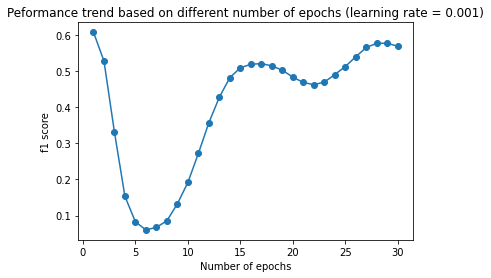

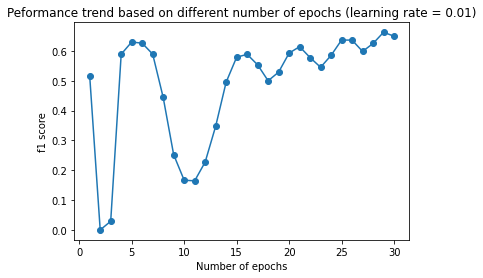

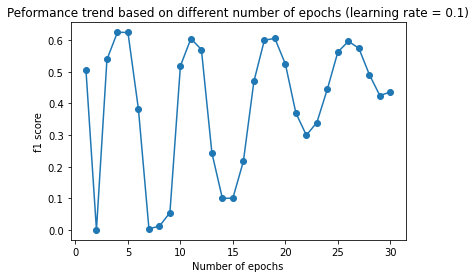

In [ ]:
# learning rate = 0.001
learning_rate = 0.001
# try no. of epochs from 1 to 30
total_epoch = 30
# for storing f1 scores for different number of epochs
f1_1 = []

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_LSTM = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_LSTM.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_5)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_5)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_LSTM.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_LSTM(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    model_LSTM.eval()
    outputs_LSTM = model_LSTM(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
    predicted_LSTM = torch.argmax(outputs, 1)

    # classification_report builds a text report showing the main classification metrics
    from sklearn.metrics import f1_score
    f1_1.append(f1_score(label_encoded_5, predicted_LSTM.cpu().numpy()))

# graphing
import matplotlib.pyplot as plt
ep = list(range(1,total_epoch+1))
plt.plot(ep,f1_1,marker='o')
plt.title('Peformance trend based on different number of epochs (learning rate = 0.001)')
plt.xlabel('Number of epochs')
plt.ylabel('f1 score')
plt.show()
##############################################################################
# learning rate = 0.01
learning_rate = 0.01
# try no. of epochs from 1 to 30
total_epoch = 30
# for storing f1 scores for different number of epochs
f1_2 = []

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_LSTM = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_LSTM.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_5)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_5)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_LSTM.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_LSTM(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    model_LSTM.eval()
    outputs_LSTM = model_LSTM(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
    predicted_LSTM = torch.argmax(outputs, 1)

    # classification_report builds a text report showing the main classification metrics
    from sklearn.metrics import f1_score
    f1_2.append(f1_score(label_encoded_5, predicted_LSTM.cpu().numpy()))

# graphing
import matplotlib.pyplot as plt
ep = list(range(1,total_epoch+1))
plt.plot(ep,f1_2,marker='o')
plt.title('Peformance trend based on different number of epochs (learning rate = 0.01)')
plt.xlabel('Number of epochs')
plt.ylabel('f1 score')
plt.show()
##############################################################################
# learning rate = 0.1
learning_rate = 0.1
# try no. of epochs from 1 to 30
total_epoch = 30
# for storing f1 scores for different number of epochs
f1_3 = []

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model_LSTM = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_LSTM.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded_5)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded_5)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model_LSTM.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model_LSTM(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    model_LSTM.eval()
    outputs_LSTM = model_LSTM(torch.from_numpy(np.array(testing_encoded1)).to(device)) 
    predicted_LSTM = torch.argmax(outputs, 1)

    # classification_report builds a text report showing the main classification metrics
    from sklearn.metrics import f1_score
    f1_3.append(f1_score(label_encoded_5, predicted_LSTM.cpu().numpy()))

# graphing
import matplotlib.pyplot as plt
ep = list(range(1,total_epoch+1))
plt.plot(ep,f1_3,marker='o')
plt.title('Peformance trend based on different number of epochs (learning rate = 0.1)')
plt.xlabel('Number of epochs')
plt.ylabel('f1 score')
plt.show()

#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [2]:
#@title Personality Type Prediction

text = "I am feeling happy" #@param {type:"string"}
##############################################################################
# best model
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

# need re for matching url
import re 

# method for removing url and doing some basic cleaning/formatting for better experience later
def url_remover(tx):
    # escape the pipe separators
    regex = re.compile('[%s]' % re.escape('|'))
    tx = regex.sub(' ',tx)
    # deal with words individually and remove those with http (i.e. url)
    ws = str(tx).split()
    ws = [x for x in ws if not 'http' in x]
    # join the words when done, then return them
    ws = ' '.join(ws)
    return ws

# apply the above method
training_posts1 = training_data['posts'].apply(url_remover)

# need re as earlier
import re
# remove punctuations and numbers, go lowercase 
def pln(x):
    x = re.sub(r'[^\w\s]','',x)
    x = re.sub('^\d+\s|\s\d+\s|\s\d+$','',x)
    x = x.lower()
    return x
training_posts1 = training_posts1.apply(pln)

# now, remove stopwords - need nltk for this
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
def stopper(x):
    tokens = word_tokenize(x)
    stop_words = sw.words()
    x = [w for w in tokens if not w in stop_words]
    return x 
training_posts1 = training_posts1.apply(stopper)

# encoding etc. done later

# cbow, more processing done later
from gensim.models import Word2Vec
wv_cbow_model2 = Word2Vec(sentences=training_posts1, size=100, window=3, min_count=5, workers=2, sg=0)

# more data processing
word_set_train = set() 
for sent in training_posts1:
    for word in sent:
        word_set_train.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set_train.add('[PAD]')
word_set_train.add('[UNKNOWN]')

word_list_train = list(word_set_train) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list_train.sort()

word_index_train = {}
ind = 0
for word in word_list_train:
    word_index_train[word] = ind
    ind += 1

# glove
import gensim.downloader as api
word_emb_model1 = api.load("glove-twitter-25")

import numpy as np
emb_dim = wv_cbow_model2.vector_size+word_emb_model1.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list_train):
    if word in word_emb_model1 and word in wv_cbow_model2:
        emb_table.append(np.concatenate((wv_cbow_model2[word],word_emb_model1[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

seq_length = 16 # otherwise too memory intensive (tried with 128 but got same accuracy anyways)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(training_posts1, seq_length, word_index_train)

from sklearn.preprocessing import LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded= lEnc.transform(training_labels)

vocab_size = len(word_list_train)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 50

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
# Define the model (Bi-LSTM)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model1 = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model1.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model1(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())


##############################################################################
# required prediction
text_encoded = encode_and_add_padding(text, len(text), word_index_train)
model1.eval()
outputs_LSTM = model1(torch.from_numpy(np.array(text_encoded)).to(device)) 
predicted_LSTM = torch.argmax(outputs_LSTM, 1)
print('Predicted Personality Type:', end=' ')
if (predicted_LSTM.numpy()[0] == 0):
    print('T')
else:
    print('F')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Predicted Personality Type: F


# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [5]:
# If you used OOP style, use this section